# Análisis del Card Sorting

## Conversión del excel a un dataframe

In [1]:
import pandas as pd
# Cargar los datos en un dataframe
excel_data = pd.ExcelFile('/content/analysis_card_sorting.xlsx')
df = excel_data.parse('Hoja1')

# Reformatear el dataframe
df.columns = ['Item', 'Desayuno_Ubicacion', 'Desayuno_Numero', 'Desayuno_Porcentaje',
              'Comida_Ubicacion', 'Comida_Numero', 'Comida_Porcentaje',
              'Cena_Ubicacion', 'Cena_Numero', 'Cena_Porcentaje']

# Convertir las columnas de números y porcentajes a valores numéricos
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.iloc[1:]

# Mostrar el dataframe
df.head()


,Item,Desayuno_Ubicacion,Desayuno_Numero,Desayuno_Porcentaje,Comida_Ubicacion,Comida_Numero,Comida_Porcentaje,Cena_Ubicacion,Cena_Numero,Cena_Porcentaje
1,Crepas,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,50.0
2,Torta de lomo,0.0,1.0,0.0,1.0,2.0,50.0,0.0,1.0,0.0
3,Burritos,1.0,4.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chilaquiles,1.0,3.0,75.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Café,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,25.0


## Matriz de similitud

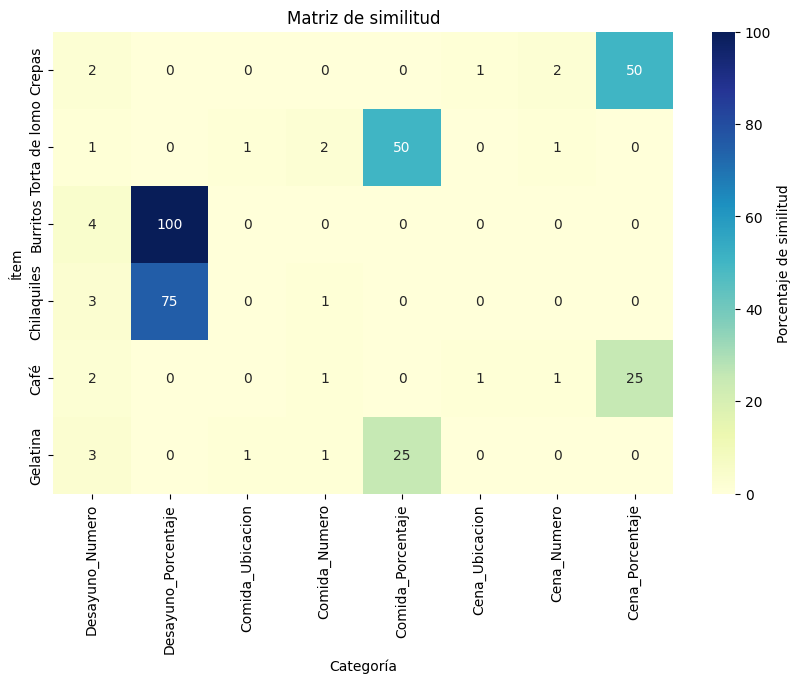

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas de porcentaje
percentage_columns = df.columns[2:]

plt.figure(figsize=(10, 6))
sns.heatmap(df[percentage_columns].fillna(0), annot=True, fmt='.0f', cmap='YlGnBu',
            yticklabels=df['Item'].fillna('Desconocido').values, cbar_kws={'label': 'Porcentaje de similitud'})
plt.title('Matriz de similitud')
plt.xlabel('Categoría')
plt.ylabel('Ítem')
plt.show()


## Porcentaje de acuerdo por categoría

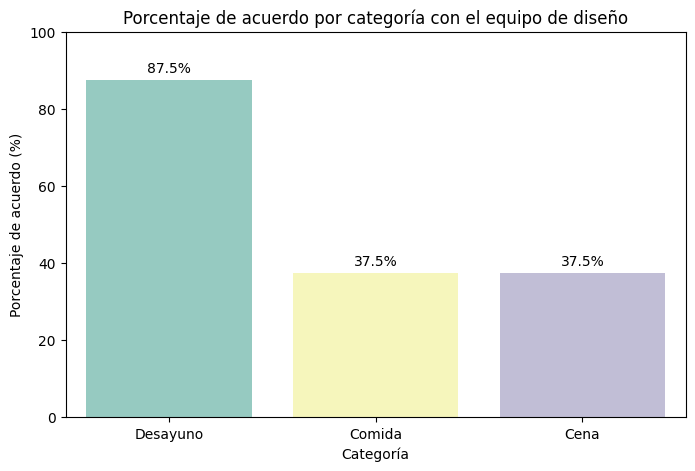

,Categoría,Porcentaje de Acuerdo
0,Desayuno,87.5
1,Comida,37.5
2,Cena,37.5


In [3]:
# Definir la función para calcular el porcentaje de acuerdo por categoría
def calcular_acuerdo_categoria(_categoria):
    categoria_items = df[df[f'{_categoria}_Ubicacion'] == 1]
    if not categoria_items.empty:
        total_correct = categoria_items[f'{_categoria}_Numero'].sum()
        total_classifications = categoria_items[['Desayuno_Numero', 'Comida_Numero', 'Cena_Numero']].sum().sum()
        return (total_correct / total_classifications) * 100 if total_classifications > 0 else 0
    else:
        return 0

# Calcular el acuerdo por categoría
acuerdo_categoria_equipo = {
    'Desayuno': calcular_acuerdo_categoria('Desayuno'),
    'Comida': calcular_acuerdo_categoria('Comida'),
    'Cena': calcular_acuerdo_categoria('Cena')
}

# Convertir a DataFrame para graficar
acuerdo_categoria_equipo_df = pd.DataFrame(
    list(acuerdo_categoria_equipo.items()),
    columns=['Categoría', 'Porcentaje de Acuerdo']
)

# Graficar el porcentaje de acuerdo por categoría corregido
plt.figure(figsize=(8, 5))
sns.barplot(x='Categoría', y='Porcentaje de Acuerdo', hue='Categoría', data=acuerdo_categoria_equipo_df, palette='Set3', legend=False)

plt.title('Porcentaje de acuerdo por categoría con el equipo de diseño')
plt.ylabel('Porcentaje de acuerdo (%)')
plt.ylim(0, 100)

# Mostrar el valor sobre cada barra
for index, row in acuerdo_categoria_equipo_df.iterrows():
    plt.text(index, row['Porcentaje de Acuerdo'] + 2, f"{row['Porcentaje de Acuerdo']:.1f}%", ha='center')

plt.show()

acuerdo_categoria_equipo_df







## Porcentaje de acuerdo general

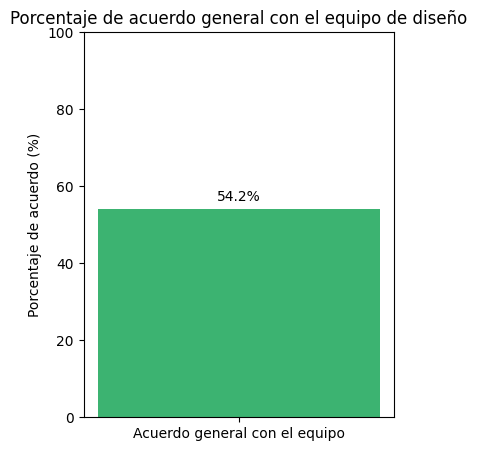

54.166666666666664

In [4]:
# Para cada ítem, identificar la categoría asignada por el equipo de diseño (donde Ubicación == 1)
def calcular_acuerdo(row):
    acuerdo = 0
    total = 0
    for category in ['Desayuno', 'Comida', 'Cena']:
        if row[f'{category}_Ubicacion'] == 1:
            acuerdo = row[f'{category}_Numero']
        total += row[f'{category}_Numero']
    return (acuerdo / total) * 100 if total > 0 else 0

# Aplicar la función a cada fila
df['Acuerdo_con_Equipo'] = df.apply(calcular_acuerdo, axis=1)

# Calcular el porcentaje de acuerdo general con el equipo de diseño
acuerdo_general_equipo = df['Acuerdo_con_Equipo'].mean()

# Graficar el porcentaje de acuerdo general con el equipo de diseño
plt.figure(figsize=(4, 5))
plt.bar(['Acuerdo general con el equipo'], [acuerdo_general_equipo], color='mediumseagreen')
plt.title('Porcentaje de acuerdo general con el equipo de diseño')
plt.ylabel('Porcentaje de acuerdo (%)')
plt.ylim(0, 100)

# Mostrar el valor sobre la barra
plt.text(0, acuerdo_general_equipo + 2, f"{acuerdo_general_equipo:.1f}%", ha='center')

plt.show()

acuerdo_general_equipo
